In [63]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import pandas as pd
import seaborn as sns
%matplotlib inline

In [64]:
sns.set()
# Increase font size and linewidth
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 5})
sns.set_style("white")
# Use LaTeX, setup to use Helvetica. This can be safely commented to make
# the installation footprint of running this code smaller -- for example,
# in Docker.
mpl.rc('text', usetex=True)
mpl.rcParams['text.latex.preamble'] = [
    r'\usepackage{amsmath}',
    r'\usepackage{helvet}',
    r'\usepackage[EULERGREEK]{sansmath}',
    r'\sansmath',
    r'\renewcommand{\familydefault}{\sfdefault}',
    r'\usepackage[T1]{fontenc}',
    r'\usepackage{graphicx}'
]

In [60]:
calcium = pd.read_csv('ca-waters.csv', header=None, 
                      names=['threshold', 'distance', 'mean', 'std'])

magnesium = pd.read_csv('mg-waters.csv', header=None, 
                      names=['threshold', 'distance', 'mean', 'std'])

thresholds = set(calcium['threshold'])

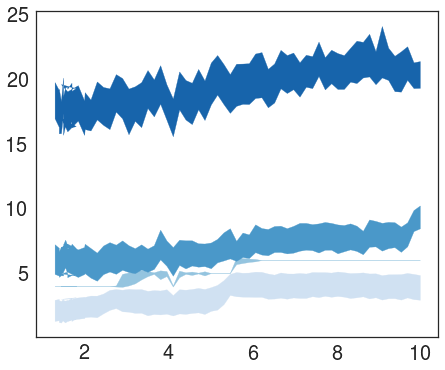

In [69]:
fig = plt.figure(figsize=(6 * 1.2, 6))
gs = GridSpec(1, 1, wspace=0.2, hspace=0.5)
ax1 = plt.subplot(gs[0, 0])
colors = sns.color_palette("Blues", n_colors=4)
for index, threshold in enumerate(thresholds):
    ax1.fill_between(calcium[calcium['threshold'] == threshold]['distance'],
             y1=calcium[calcium['threshold'] == threshold]['mean'] + calcium[calcium['threshold'] == threshold]['std'],
             y2=calcium[calcium['threshold'] == threshold]['mean'] - calcium[calcium['threshold'] == threshold]['std'],        
            color=colors[index])